In [1]:
!pip install pandas matplotlib scikit-learn openpyxl

## **Descripción Caso de Estudio y Variables**

0. Se cargan las liberias de trabajo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Las librerias para la clusterización
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

1. Se procede con la carga de la base de datos y la selección de las variables de trabajo

In [3]:
nxl='./../datos/0. SolicitantesCrédito(USD).xlsx'
XDB=pd.read_excel(nxl,sheet_name=1)  #Base AAA

XDB.head()

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,1,38,NR,Casado,1,0,0,3,Bachiller,Ninguno,...,48,18.375890,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.041659,582.478943,0.063702
1,2,51,NR,Separado,6,1,1,4,Técnico,Ninguno,...,36,5.062492,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.234951,479.839966,0.465636
2,3,37,Mujer,Casado,2,0,0,3,Tecnólogo,Indefinido,...,36,10.287688,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.170330,417.653107,0.290071
3,4,29,NR,Separado,1,0,0,2,Tecnólogo,Ninguno,...,24,15.458878,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.201659,316.791107,0.278389
4,5,42,Mujer,Casado,3,4,4,2,Especializacion,Ninguno,...,24,24.995180,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.140929,441.809570,0.203359


In [4]:


#Seleccionamos las variables de trabajo
XDB=XDB[['Edad','Ingresos','Egresos','Monto (EAD)','PreApr']]
XDB=XDB.dropna()
XDB.head()

#Análisis de Correlación - Cuales variables tienen más afinidad
import seaborn as sns
sns.heatmap(XDB.corr(),annot=True)

plt.figure()
sns.pairplot(XDB,hue='PreApr',size=4,vars=['Edad','Ingresos','Egresos','Monto (EAD)'])
plt.show()

ModuleNotFoundError: No module named 'seaborn'

2. Se implementa el modelo de cluatering (k-means)

Edad, Ingresos, Egresos, Monto (EAD)

[[  41.13045611  700.94181927  594.22875091  529.66765171]
 [  40.90441176 1930.5114329  2026.03599101 1140.80106045]
 [  40.96395469 1167.56457775 1226.93772674  655.30527084]
 [  40.81030928 1375.63224691  823.62006048 1499.46367136]
 [  41.07228916  236.55192554  207.18873039  170.96460534]]


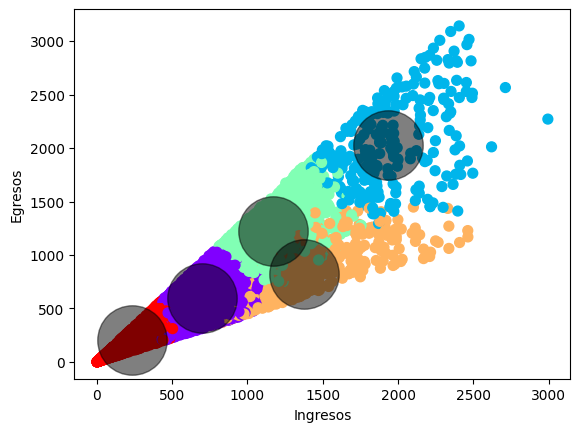

In [ ]:
np.random.seed(42)  #Para generar las mismas semillas
k=5   #Le indico el número de clusters o grupos de datos - características similares
XD=np.array(XDB[['Edad','Ingresos','Egresos','Monto (EAD)']]) #Variables de Entrada
yd=np.array(XDB['PreApr'])  #Variables de Salida

mkm=KMeans(n_clusters=5,init='random',random_state=42)
mkm.fit(XD,yd)  #Ajustar el modelo a 5 grupos de datos
centroids=mkm.cluster_centers_
ydc=mkm.labels_  #Cuantas personas quedaron en cada cluster
print("Edad, Ingresos, Egresos, Monto (EAD)\n")
print(centroids)

plt.figure()
plt.scatter(XD[:,1],XD[:,2],c=ydc,s=50,cmap='rainbow')
plt.scatter(centroids[:,1],centroids[:,2],c='black',s=2500,alpha=0.5)
plt.xlabel('Ingresos')
plt.ylabel('Egresos')

#Para colocar el número del centroide
#for i,c in enumerate(centroids):
#  plt.text(c[1],c[2],str(i),fontsize=12, color='black')

plt.show()

3. ¿Cuantos aprobados y negados hay por cluster?

In [ ]:
ND=np.bincount(ydc)  #Cuantos datos hay por cluster
XDB["Cluster"]=ydc   #Columna adicional con los clusters de pertenencia
display(XDB)
N_Apr_Neg=XDB.groupby('Cluster')['PreApr'].value_counts()
NApr=XDB.groupby('Cluster').agg({"PreApr":lambda x: (x==1).sum()})
NNeg=XDB.groupby('Cluster').agg({"PreApr":lambda x: (x==0).sum()})
print(ND)
print(NApr)
print(NNeg)

,Edad,Ingresos,Egresos,Monto (EAD),PreApr,Cluster
0,38,1356.14400,1685.622667,625.562230,1,2
1,51,286.01600,364.462000,140.031984,1,4
2,37,517.46325,629.208889,284.564492,0,0
3,29,473.27000,551.616889,309.647588,1,0
4,42,750.09175,806.715778,500.663578,1,0
...,...,...,...,...,...,...
5837,48,1207.84800,753.801111,748.041791,1,2
5838,31,1472.77200,953.812889,870.793819,1,2
5839,38,773.01975,672.910667,594.947894,1,0
5840,43,635.50175,780.691556,305.580539,1,0


[2039  272  971  485 2075]
         PreApr
Cluster        
0          1136
1           261
2           745
3           472
4           269
         PreApr
Cluster        
0           903
1            11
2           226
3            13
4          1806


4. Se procede a evaluar el modelo

In [ ]:
ydp=np.zeros((len(XD),1))
NApr=np.array(NApr); NNeg=np.array(NNeg)  #Aquí convierto los vectores en arrays
print("La decima persona pertenece la cluster",ydc[9])
print("Quien es la persona",XD[9])
print("El número de personas aprobadas en este cluster es",NApr[4,])
print("El número de personas negadas en este cluster es",NNeg[4,])

if NApr[4,]>NNeg[4,]:
  print("El crédito es Aprobado")
else:
  print("El crédito es Negado")

for k in range(len(XD)):
  print("La persona",k)
  print("pertenence al cluster",ydc[k])
  #Para aprobar o negar
  nc=ydc[k]  #Cluster al que pertenece

  if NApr[nc,]>NNeg[nc,]:
    print("El crédito es Aprobado")
  else:
    print("El crédito es Negado")


La decima persona pertenece la cluster 4
Quien es la persona [ 25.         285.3135     203.33933333 199.60047614]
El número de personas aprobadas en este cluster es [269]
El número de personas negadas en este cluster es [1806]
El crédito es Negado
La persona 0
pertenence al cluster 2
El crédito es Aprobado
La persona 1
pertenence al cluster 4
El crédito es Negado
La persona 2
pertenence al cluster 0
El crédito es Aprobado
La persona 3
pertenence al cluster 0
El crédito es Aprobado
La persona 4
pertenence al cluster 0
El crédito es Aprobado
La persona 5
pertenence al cluster 0
El crédito es Aprobado
La persona 6
pertenence al cluster 4
El crédito es Negado
La persona 7
pertenence al cluster 0
El crédito es Aprobado
La persona 8
pertenence al cluster 4
El crédito es Negado
La persona 9
pertenence al cluster 4
El crédito es Negado
La persona 10
pertenence al cluster 1
El crédito es Aprobado
La persona 11
pertenence al cluster 0
El crédito es Aprobado
La persona 12
pertenence al cluster 0

##**Análisis de Resultados**
En el mapa de correlación se puede observar que las variables que tuvieron una mayor correlación fueron las variables de Ingresos y Egresos con un valor que estuvo cercano al 85%.En este mismo mapa se puede observar que la variable ingresos logró separar de mejor manera los datos frente a la preaprobación (picos de las gráficas). De acuerdo con los clusters (Perfiles de Solicitantes) podemos observar que el cluster uno (1) presentó los mejores valores para las variables Ingresos (1930), Egresos (2026),con Montos promedio de 1140 USD. Se destaca igualmente el clsuter tres (3), el cual posee los segundos ingresos más altos dentro de los perfiles de solicitantes de crédito (1375) USD. El perfil de crédito uno (1) me representa los mejores clientes potenciales.